# Vizualizacija podatkov

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

df = pd.read_excel("data_cleaned.xlsx")
#df = df.drop(df.columns[5], axis=1)# to je zelo slaba koda
df = df.drop('Unnamed: 0', axis=1)

In [2]:
df = df.apply(pd.to_numeric, errors='coerce')

In [3]:
df.head()

,Uspesnost,Ocena,Interakcija_kvantitativno,Interakcija_kvalitativno,Outperforming_partner,Razred,Profesor,Spol,Motivacija,Anksioznost,Introvertiranost,Sensing,Feeling,Judging
0,2,5,3,3,2,0,1,0,17,27,19,17,25,26
1,3,2,3,2,2,0,1,0,20,22,20,31,33,20
2,2,4,2,2,2,0,1,0,27,30,25,25,25,23
3,3,2,2,2,1,0,1,0,20,17,21,25,34,25
4,2,4,2,2,3,0,1,1,21,24,23,23,20,24


<Axes: xlabel='Anksioznost'>

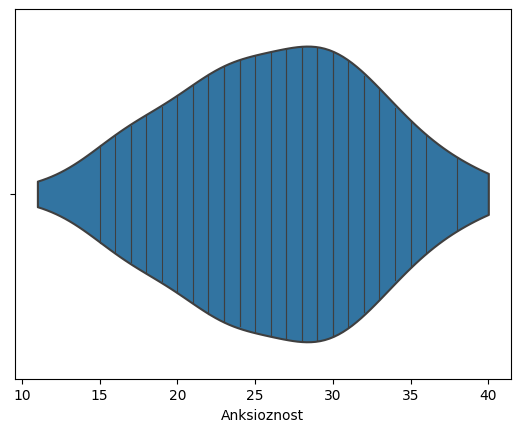

In [4]:
import seaborn as sns

sns.violinplot(x=df["Anksioznost"], cut=0, inner="stick")

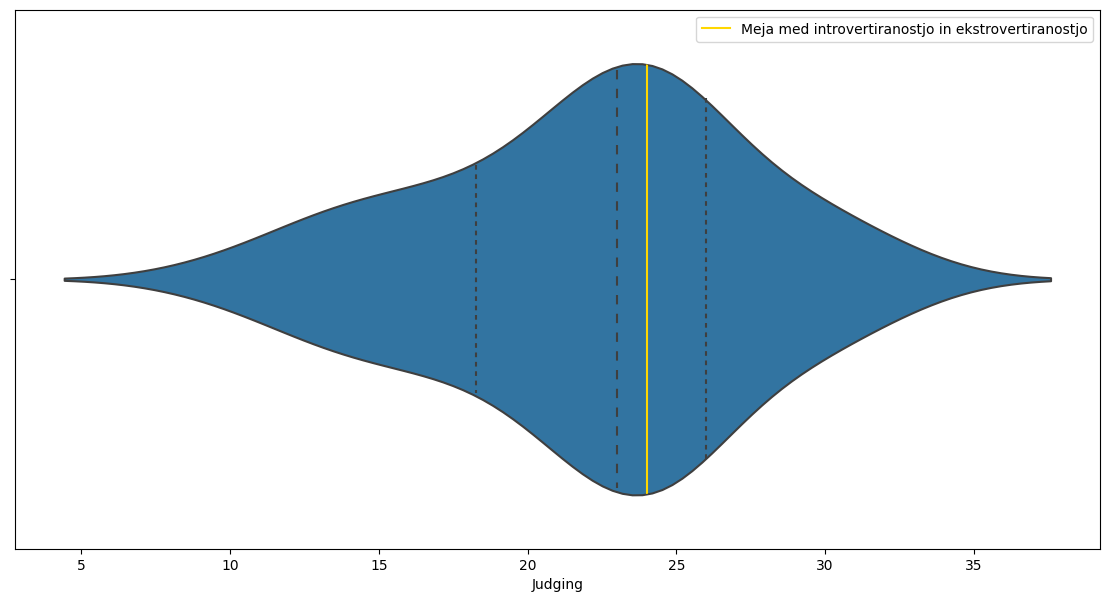

In [5]:
import matplotlib.pyplot as plt
from matplotlib.patches import PathPatch
import seaborn as sns
import numpy as np

plt.figure(figsize=(14, 7))

ax = sns.violinplot(x=df["Judging"], inner="quart")

# where quantile should be actually drawn
line24 = ax.axvline(x=24, color="gold", label="Meja med introvertiranostjo in ekstrovertiranostjo")
patch = PathPatch(ax.collections[0].get_paths()[0], transform=ax.transData)
line24.set_clip_path(patch) # clip the line by the form of the violin

ax.legend()
plt.show()

In [6]:
df.describe(include='all')

,Uspesnost,Ocena,Interakcija_kvantitativno,Interakcija_kvalitativno,Outperforming_partner,Razred,Profesor,Spol,Motivacija,Anksioznost,Introvertiranost,Sensing,Feeling,Judging
count,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000
mean,2.442857,3.371429,2.157143,2.157143,2.085714,3.285714,1.657143,0.714286,19.857143,26.257143,20.557143,22.857143,23.100000,22.142857
std,0.605188,0.995227,0.673208,0.694402,0.583415,2.627297,1.165764,0.455016,6.272289,6.287060,5.492117,4.795184,4.899423,5.354899
min,1.000000,2.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,7.000000,11.000000,10.000000,12.000000,9.000000,9.000000
25%,2.000000,2.250000,2.000000,2.000000,2.000000,0.000000,1.000000,0.000000,15.250000,22.000000,17.000000,20.000000,20.000000,18.250000
50%,2.500000,4.000000,2.000000,2.000000,2.000000,3.500000,1.500000,1.000000,20.000000,27.000000,21.000000,23.000000,23.000000,23.000000
75%,3.000000,4.000000,3.000000,3.000000,2.000000,5.000000,3.000000,1.000000,24.000000,30.750000,24.000000,25.000000,26.000000,26.000000
max,3.000000,5.000000,3.000000,3.000000,3.000000,7.000000,3.000000,1.000000,33.000000,40.000000,37.000000,35.000000,34.000000,33.000000


In [7]:
df.head()

,Uspesnost,Ocena,Interakcija_kvantitativno,Interakcija_kvalitativno,Outperforming_partner,Razred,Profesor,Spol,Motivacija,Anksioznost,Introvertiranost,Sensing,Feeling,Judging
0,2,5,3,3,2,0,1,0,17,27,19,17,25,26
1,3,2,3,2,2,0,1,0,20,22,20,31,33,20
2,2,4,2,2,2,0,1,0,27,30,25,25,25,23
3,3,2,2,2,1,0,1,0,20,17,21,25,34,25
4,2,4,2,2,3,0,1,1,21,24,23,23,20,24


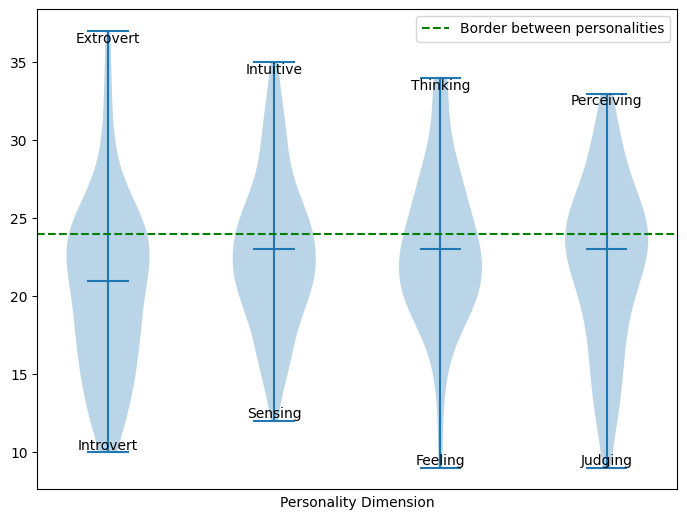

In [8]:
fig = plt.figure()

data_to_plot = [df["Introvertiranost"], df["Sensing"], df["Feeling"], df["Judging"]]

# Create an axes instance
ax = fig.add_axes([0,0,1,1])

# Create the boxplot
positions = [1, 2, 3, 4]
bp = ax.violinplot(data_to_plot, positions=positions, showmedians=True)

plt.axhline(y=24, color ="green", linestyle ="--", label="Border between personalities")

#plt.xticks(positions, ['Introvertiranost', 'Sensing', 'Feeling', "Judging"])
ax.set_xlabel('Personality Dimension')
plt.xticks([], [])  # Remove x-axis ticks and labels

# Define personalized labels for each violin plot
top_labels = ["Introvert", "Sensing", "Feeling", "Judging"]
bottom_labels = ["Extrovert", "Intuitive", "Thinking", "Perceiving"]

# Add text labels to the top and bottom of each violin plot
for i, data in enumerate(data_to_plot):
    min_value = min(data)
    max_value = max(data)
    ax.text(positions[i], min_value, top_labels[i], ha='center', va='bottom')
    ax.text(positions[i], max_value, bottom_labels[i], ha='center', va='top')

    
ax.legend()

plt.show()

In [9]:
"""exclude = ['Unnamed: 58','Introvertiranost','Judging','Sensing', "Feeling", "Spol", "Profesor", "Razred"]
df.loc[:, df.columns.difference(exclude)].hist(figsize=(14,8))
plt.tight_layout()
plt.show()"""

'exclude = [\'Unnamed: 58\',\'Introvertiranost\',\'Judging\',\'Sensing\', "Feeling", "Spol", "Profesor", "Razred"]\ndf.loc[:, df.columns.difference(exclude)].hist(figsize=(14,8))\nplt.tight_layout()\nplt.show()'

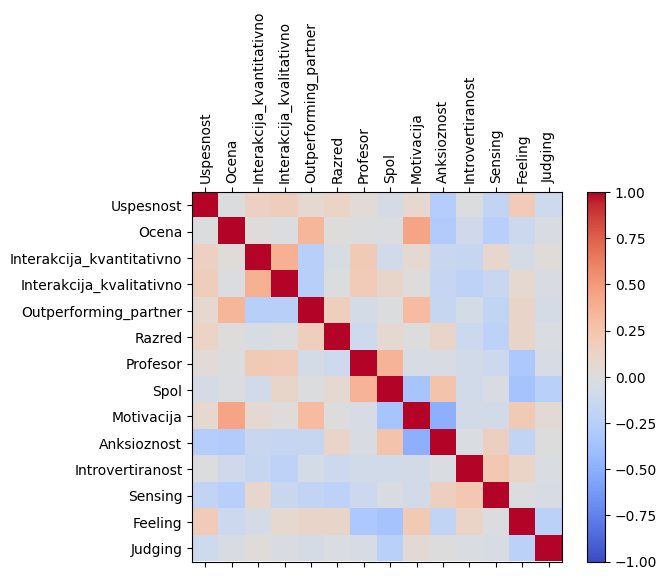

In [10]:
corr = df.corr()
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(corr,cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(df.columns),1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(df.columns)
ax.set_yticklabels(df.columns)
plt.show()

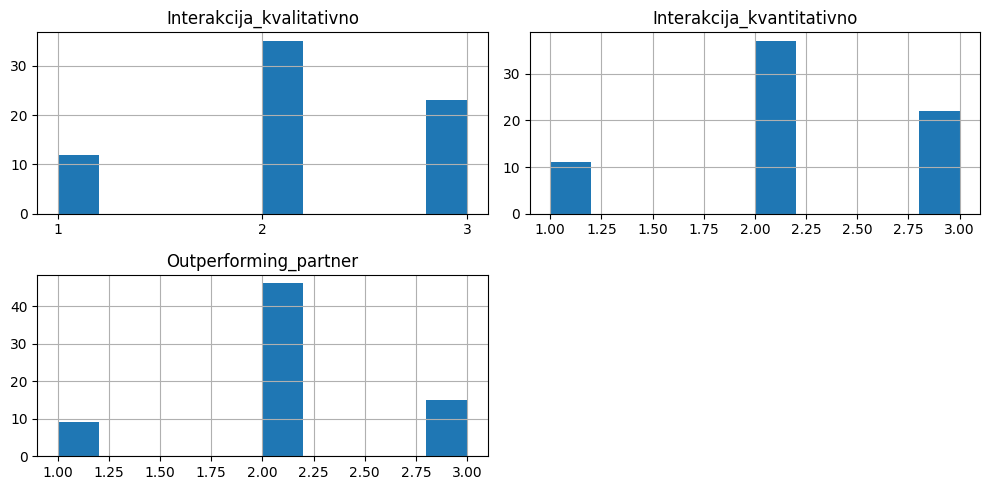

In [11]:
include = ['Interakcija_kvalitativno', 'Interakcija_kvantitativno', 'Outperforming_partner']  # Specify the columns you want to include in the histogram

ax = df[include].hist(figsize=(10, 5))

# Set the x-axis ticks to 1, 2, and 3
ax[0][0].set_xticks([1, 2, 3])

plt.tight_layout()
plt.show()

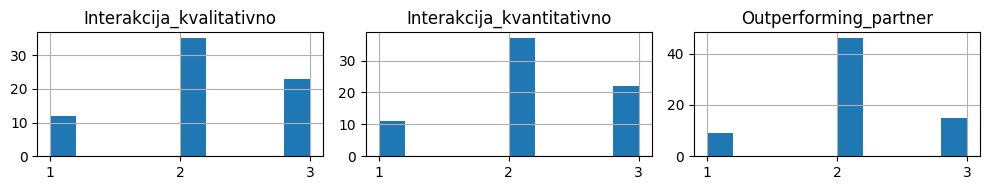

In [12]:
import matplotlib.pyplot as plt

include = ['Interakcija_kvalitativno', 'Interakcija_kvantitativno', 'Outperforming_partner']  # Specify the columns you want to include in the histogram

fig, axes = plt.subplots(1, len(include), figsize=(10, 2))  # Create a single row of subplots

for i, column in enumerate(include):
    df[column].hist(ax=axes[i])
    axes[i].set_title(column)
    axes[i].set_xticks([1, 2, 3])

plt.tight_layout()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


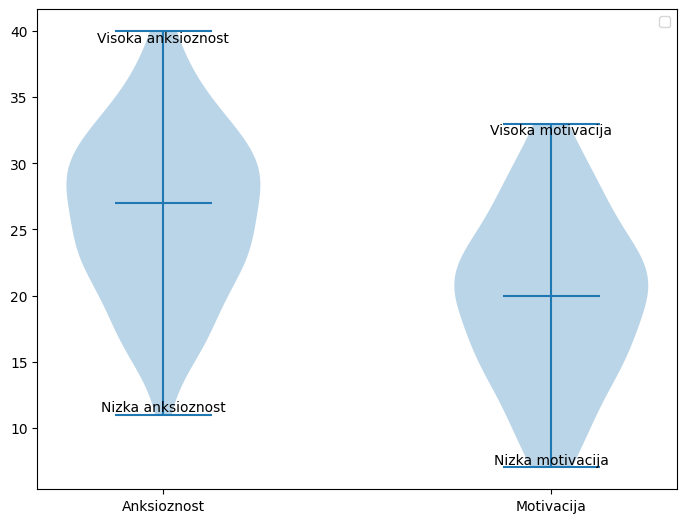

In [13]:
fig = plt.figure()

data_to_plot = [df["Anksioznost"], df["Motivacija"]]

# Create an axes instance
ax = fig.add_axes([0,0,1,1])

# Create the boxplot
positions = [1, 2]
bp = ax.violinplot(data_to_plot, positions=positions, showmedians=True)

#plt.axhline(y=24, color ="green", linestyle ="--", label="Border between personalities")

plt.xticks(positions, ['Anksioznost', 'Motivacija'])

# Define personalized labels for each violin plot
top_labels = ["Nizka anksioznost", "Nizka motivacija"]
bottom_labels = ["Visoka anksioznost", "Visoka motivacija"]

# Add text labels to the top and bottom of each violin plot
for i, data in enumerate(data_to_plot):
    min_value = min(data)
    max_value = max(data)
    ax.text(positions[i], min_value, top_labels[i], ha='center', va='bottom')
    ax.text(positions[i], max_value, bottom_labels[i], ha='center', va='top')

    
ax.legend()

plt.show()